# Processo Seletivo - Liber Capital

## 1. Introdução

Uma das etapas do processo seletivo para o cargo de cientista de dados da empresa Liber Capital consiste um solucionar um problema de négocio a partir da análise de dados e técnicas de predição. Portanto este notebook conterá a resolução do problema que será descrito a seguir. Como ferramenta de análise, será utilizado a linguagem de programação Python e também algumas bibliotecas específicas para alçancar os objetivos esperados.

Segundo alguns dados fornecidos, A Lumia quer expandir seus negócios e para isso precisa automatizar o processo decisório
de crédito, que até então vinha sendo feito de forma manual pelo seu time de analistas de crédito. Para isso, solicitou a você, cientista de dados, a análise da base dos créditos concedidos aos seus clientes no ano de 2020. O objetivo é, que a cada nova proposta de crédito, na sua plataforma digital, a aprovação (para bons clientes) ou recusa (para os maus
clientes) seja decidida em poucos segundos.

Os dados que foram utilizados para a resolução deste problema esta disponível no seguinte link: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29


# Entendendo o dataset:

Segundo as informações mostrados no site do onde está contido os dados, há um total de 20 variáveis sendo 7 delas numéricas e 13 delas categóricas.

A variável alvo é a classificação do cliente, que é representada pelos seguintes valores:
- 1 = cliete bom
- 2 = cliente ruim

Abaixo será mostrado as informações contidas no site das demais variaveis presentes nos dados:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

Link guia: https://ensinandomaquinasblog.wordpress.com/2018/07/10/identificacao-de-risco-de-credito-statlog-german-credit-data/

## 2. Importando as bibliotecas

Neste tópico será importado as bibliotecas necessárias para a resolução do problema apresentado pela empresa.

In [1]:
#Bibliotecas para visualização e leitura dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca Estatística
import scipy.stats as ss

#Bibliotecas auxiliares
import itertools
import numpy as np

#Bibliotecas para validação dos modelos preditivos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Bibliotecas com modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Seleção de Feature
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

#Tunning
from sklearn.model_selection import GridSearchCV

#Biblioteca para tratar variaveis categóricas
from category_encoders import TargetEncoder

# Biblioteca para ocultar avisos
import warnings
warnings.filterwarnings('ignore')

# Random seed
np.random.seed(42)

## 3. Leitura dos dados

Nesta etapa será lido o arquivo de dados providenciado pela empresa para a resolução do problema descrito. Também será mostrado as informações contidas neste arquivo.

In [2]:
#Lendo o arquivo de dados fornecido
df = pd.read_fwf("german.data", header = None)

In [3]:
df

,0,1
0,A11,6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A1...
1,A12,48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A...
2,A14,12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A...
3,A11,42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A...
4,A11,24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A...
...,...,...
995,A14,12 A32 A42 1736 A61 A74 3 A92 A101 4 A121 31 A...
996,A11,30 A32 A41 3857 A61 A73 4 A91 A101 4 A122 40 A...
997,A14,12 A32 A43 804 A61 A75 4 A93 A101 4 A123 38 A1...
998,A11,45 A32 A43 1845 A61 A73 4 A93 A101 4 A124 23 A...


Como mostrado acima, a biblioteca pandas teve alguns problemas em separar as informações fornecidas em colunas específicas para o inicio da análise. Portanto será necessário a realização de um tratamento dos dados lidos para que tenhamos um dataframe mais proxíma da realidade. 

In [4]:
#Seperando os dados
test = []
for i in df[1]:
    test.append(i.split())

In [5]:
#Convertendo os dados separados em um dataframe
data_2 = pd.DataFrame(test)

In [6]:
#Juntando dos dois datasets
data = pd.concat([df[0],data_2], axis = 1)

In [7]:
#Como o dataset fornecido não apresenta o nome das colunas, a partir da informações descritas das colunas, será colocado
# o nome em cada uma para uma melhor identificação.
columns = [
    'Status of existing account',
    'Duration in month',
    'Credit History',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'foreign worker',
    'Credit_Class'
]

In [8]:
#Atribuindo os nomes das colunas do dataframe
data.columns = columns

In [9]:
data

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit_Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [10]:
#Quantidade de linhas e colunas do dataset
data.shape

(1000, 21)

In [11]:
#Obtendo algumas informações gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing account                                1000 non-null   object
 1   Duration in month                                         1000 non-null   object
 2   Credit History                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   object
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   object
 8   Personal status and sex      

Como podemos observar acima, as colunas que contem informações númericas não foram renhecidas pelo pandas. Portanto elas serão convertidas manualmente.

In [12]:
#Variaveis númericas segundo a empresa
numerical_columns = [
    'Duration in month',
    'Credit amount',
    'Installment rate in percentage of disposable income',
    'Present residence since',
    'Age',
    'Number of existing credits at this bank',
    'Number of people being liable to provide maintenance for',
]

In [13]:
#Conversão
for col in numerical_columns:
    data[col] = data[col].astype('float')

In [14]:
#Conferindo a conversão
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing account                                1000 non-null   object 
 1   Duration in month                                         1000 non-null   float64
 2   Credit History                                            1000 non-null   object 
 3   Purpose                                                   1000 non-null   object 
 4   Credit amount                                             1000 non-null   float64
 5   Savings account/bonds                                     1000 non-null   object 
 6   Present employment since                                  1000 non-null   object 
 7   Installment rate in percentage of disposable income       1000 non-null   float64
 8   Personal status and

Como podemos ver acima, as variaveis númericas foram convertidas com sucesso.

## 4. Limpeza dos dados

In [15]:
#Checkando se há valores nulos
data.isnull().sum()

Status of existing account                                  0
Duration in month                                           0
Credit History                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

Como podemos observar, há 5 valores faltantes na coluna de Credit_Class

In [16]:
#Observando as linhas que possuem a informação faltante
data[data['Credit_Class'].isnull()]

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit_Class
105,A12,24.0,A34,A410,11938.0,A61,A73,2.0,A93,A102,...,A123,39.0,A143,A152,2.0,A174,2.0,A192,A201,None
374,A12,60.0,A31,A410,14782.0,A62,A75,3.0,A92,A101,...,A124,60.0,A141,A153,2.0,A174,1.0,A192,A201,None
431,A12,24.0,A32,A410,11328.0,A61,A73,2.0,A93,A102,...,A123,29.0,A141,A152,2.0,A174,1.0,A192,A201,None
818,A11,36.0,A32,A410,15857.0,A61,A71,2.0,A91,A102,...,A123,43.0,A143,A152,1.0,A174,1.0,A191,A201,None
915,A12,48.0,A30,A410,18424.0,A61,A73,1.0,A92,A101,...,A122,32.0,A141,A152,1.0,A174,1.0,A192,A202,None


Como não sabemos o real motivo destas linhas apresentarem valores nulos, então elas serão removidas da análise.

In [17]:
#Eliminando as linhas com valores nulos
data = data.dropna()

In [18]:
#Checkando se os valores nulos foram retirados
data.isnull().sum()

Status of existing account                                  0
Duration in month                                           0
Credit History                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [19]:
#Checkando se há valores duplicados
data.duplicated().sum()

0

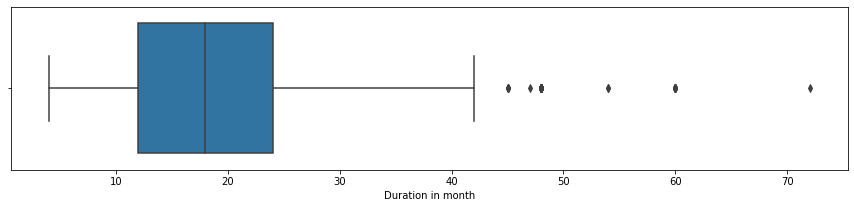

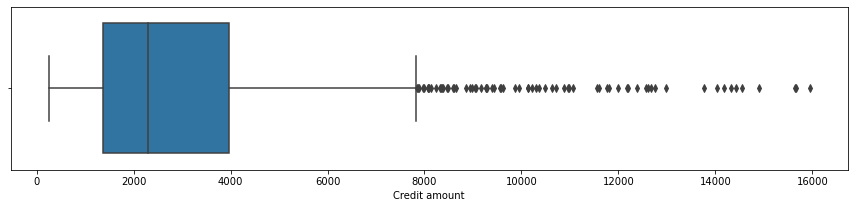

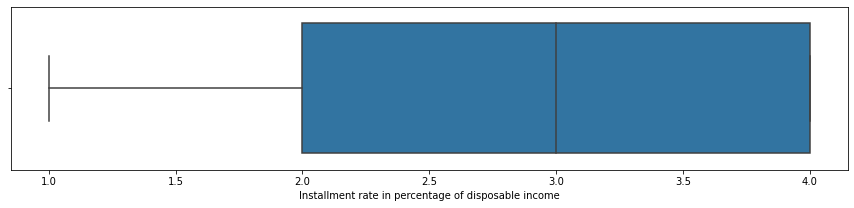

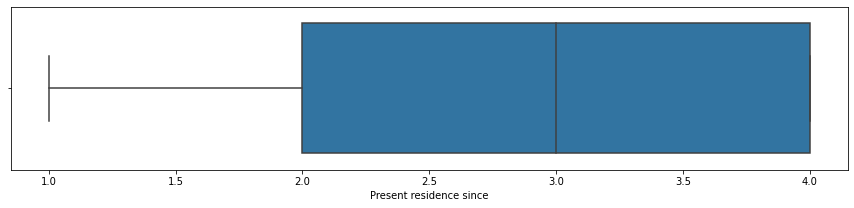

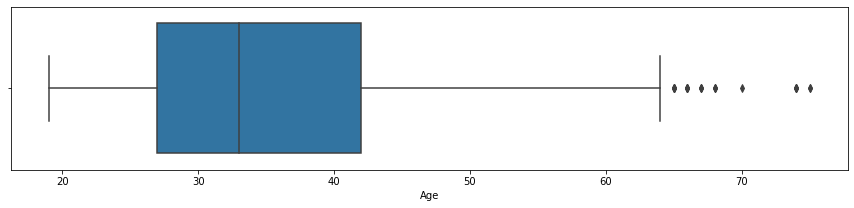

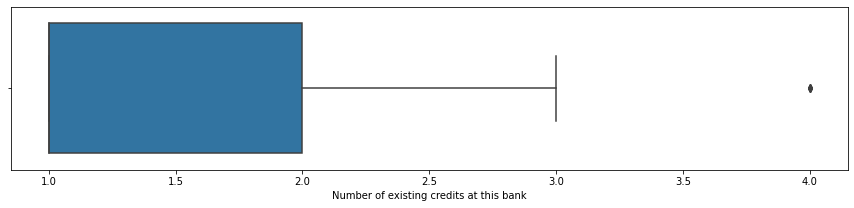

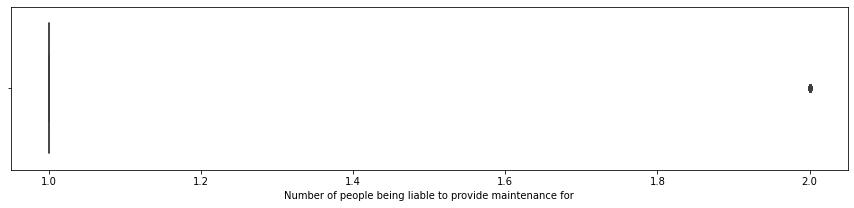

In [20]:
#Checkando se há outliers nas colunas numéricas
for col in numerical_columns:
    plt.figure(figsize=(15,3))
    sns.boxplot(x = data[col])
    plt.show()

Como mostrado acima, nas colunas: Credit amount, Idade, Number os existing credits at this bank e Number of people being liable to provide maintenance for; há a presença de outliers.

Como não sabemos a origem deste outliers, a melhor decisão a ser tomada é mante-lôs nos dados.

## 5. EDA (Exploratory Data Analysis)

Nesta seção será analisa as relações das variavéis contidas neste conjunto de dados e como ela está relacionada com a classificação do cliente, que é o objetivo deste projeto.

In [21]:
#Obtendo as informações de estatística descritiva das variaveis númericas
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,20.815075,3215.004020,2.977889,2.844221,35.520603,1.406030,1.154774
std,11.983892,2709.287952,1.118490,1.105526,11.372172,0.577899,0.361871
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2303.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3959.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [22]:
#Pegando as colunas categoricas
categorical_columns = data.select_dtypes(include='object').columns

categorical_columns = categorical_columns.to_list()

In [23]:
categorical_columns

['Status of existing account',
 'Credit History',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'Job',
 'Telephone',
 'foreign worker',
 'Credit_Class']

In [24]:
#Observando quantos valores únicos existe em cada variavel categórica
for col in categorical_columns:
    print(col ,': has',data[col].nunique(),'differents categories')

Status of existing account : has 4 differents categories
Credit History : has 5 differents categories
Purpose : has 10 differents categories
Savings account/bonds : has 5 differents categories
Present employment since : has 5 differents categories
Personal status and sex : has 4 differents categories
Other debtors / guarantors : has 3 differents categories
Property : has 4 differents categories
Other installment plans : has 3 differents categories
Housing : has 3 differents categories
Job : has 4 differents categories
Telephone : has 2 differents categories
foreign worker : has 2 differents categories
Credit_Class : has 2 differents categories


In [25]:
#Configurando o fundo dos gráficos
sns.set_style('darkgrid')

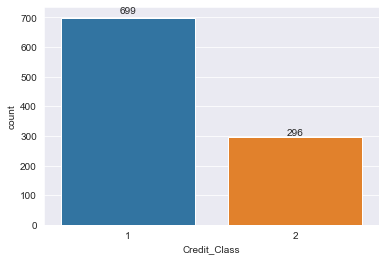

In [26]:
#Observando a variável alvo
ax = sns.countplot(data['Credit_Class'])
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),  y  = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')

Como podemos ver, existe mais clientes do tipo 1 do que do tipo 2. Assim podemos concluir que há um desbalanceamento de classes nesta análise.

### 5.1 Variáveis Categóricas

Será explorado as variaveis categóricas e suas relações com a classificação dos clientes

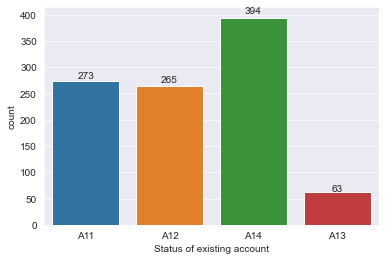

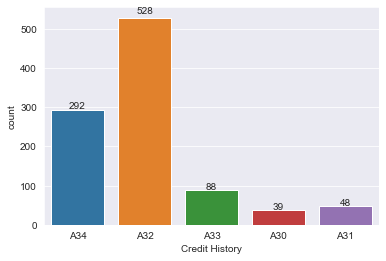

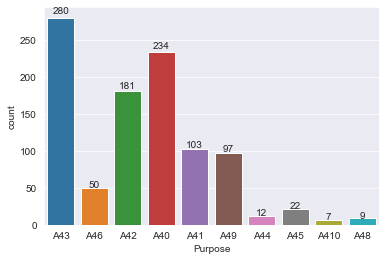

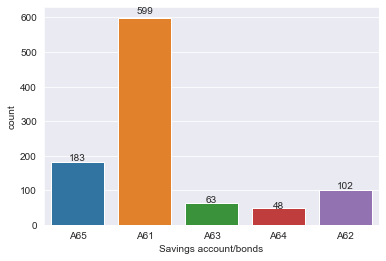

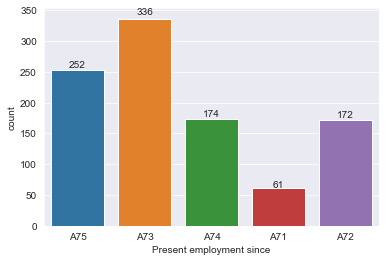

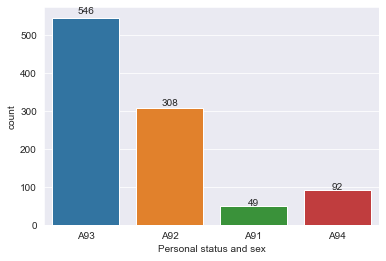

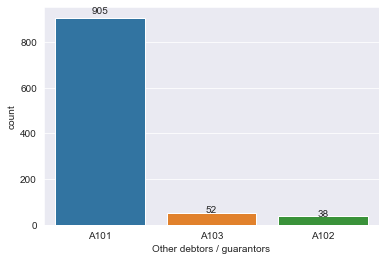

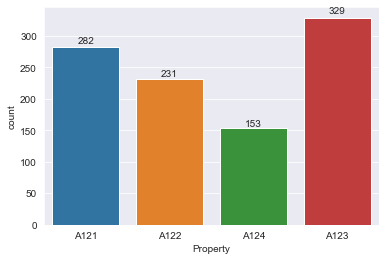

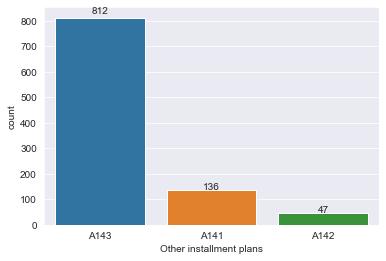

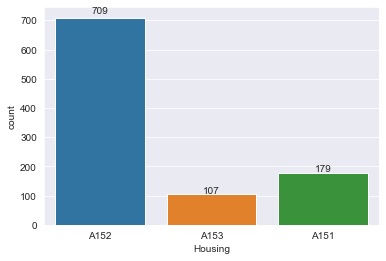

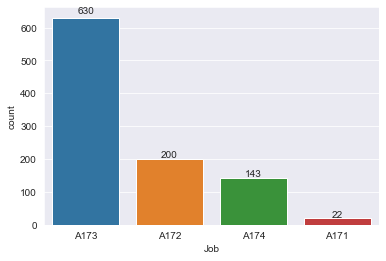

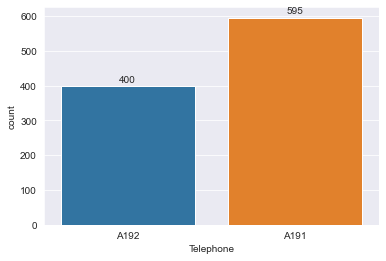

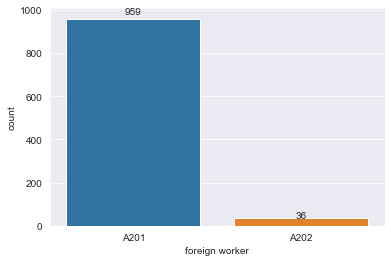

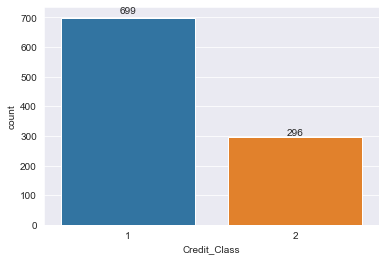

In [27]:
#Exibindo gráficos da variaveis categóricas
for col in categorical_columns:
    ax = sns.countplot(data[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),  y  = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')
    plt.show()

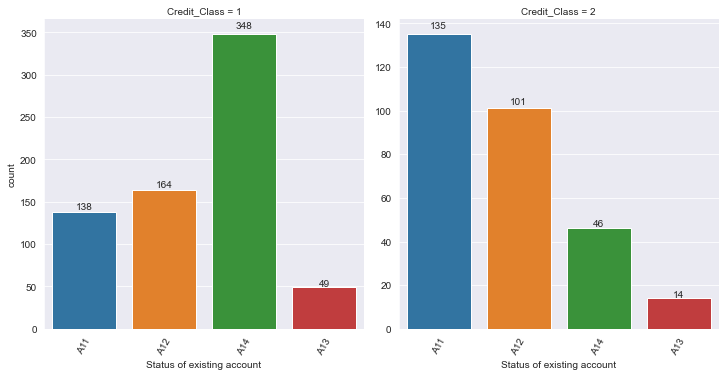

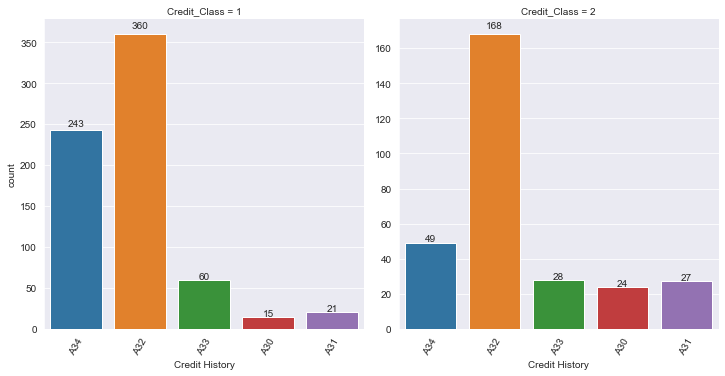

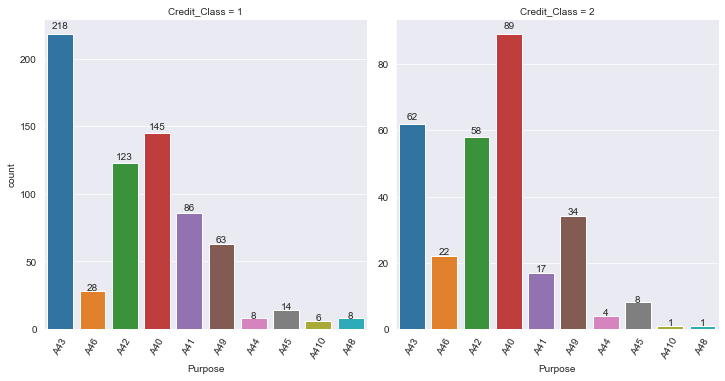

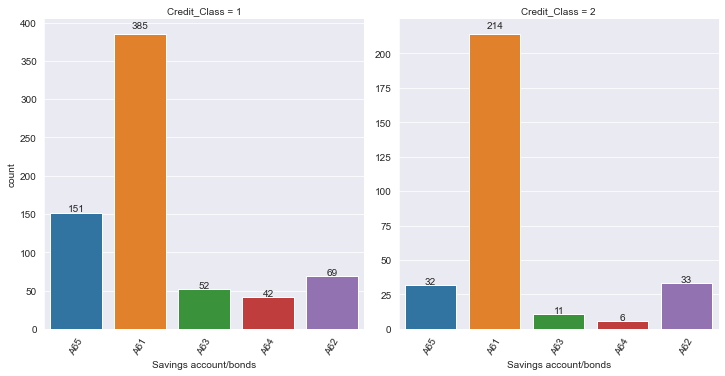

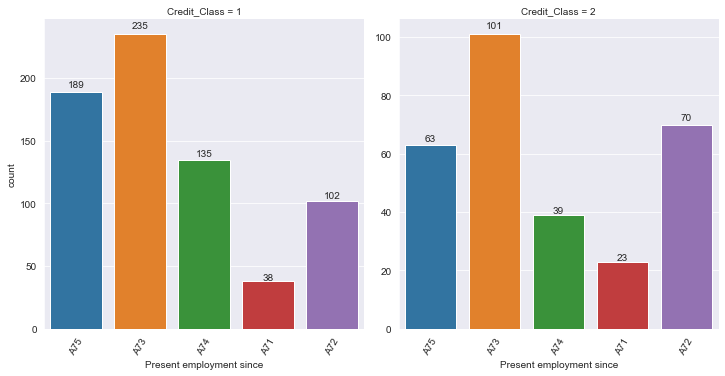

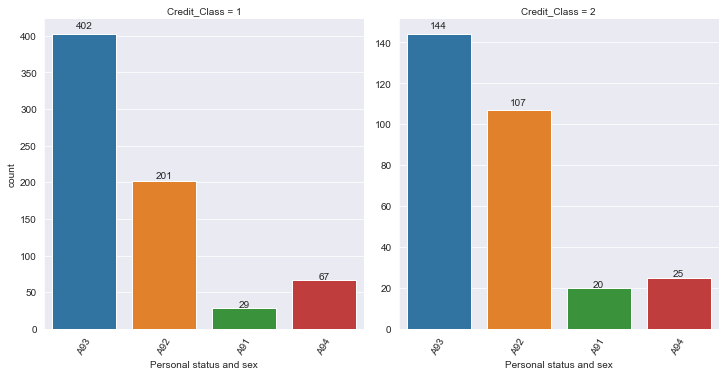

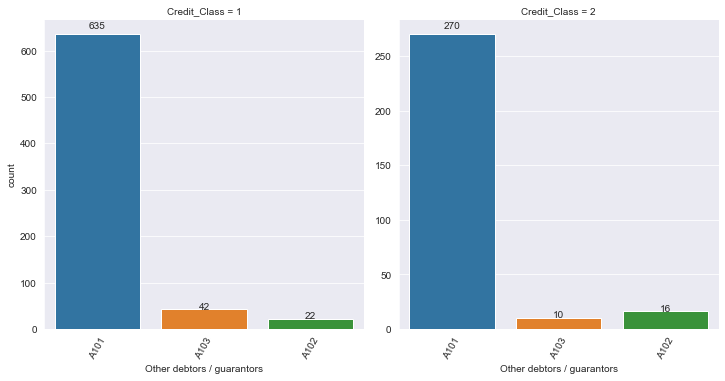

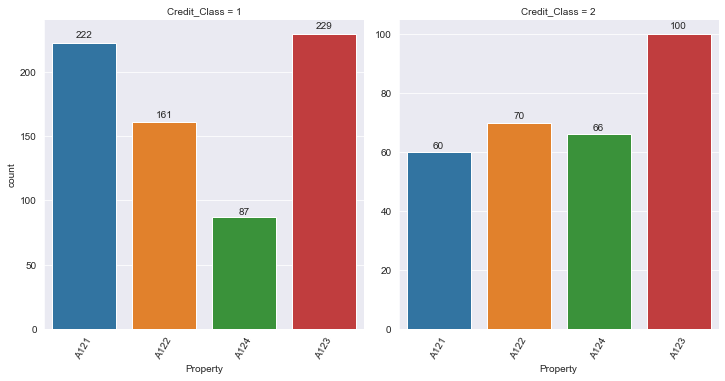

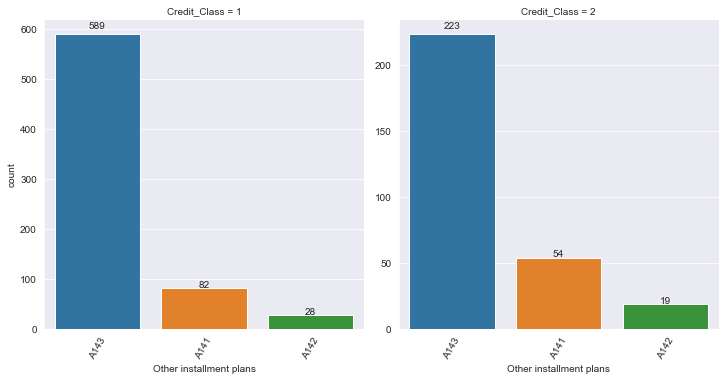

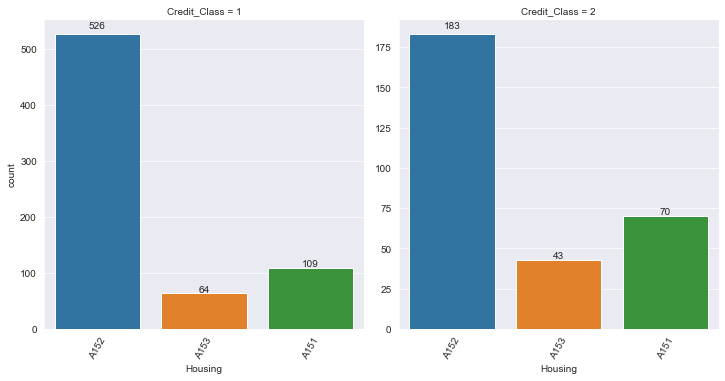

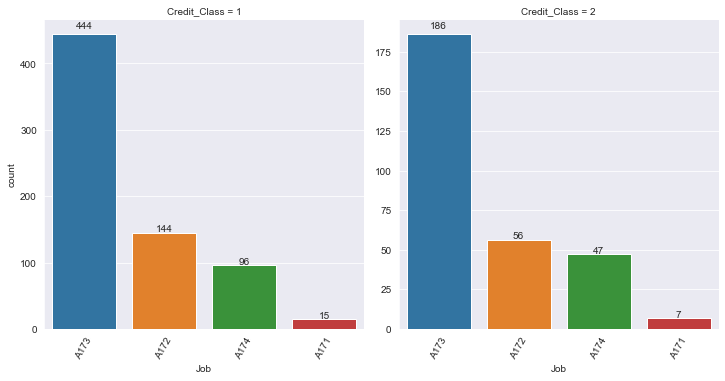

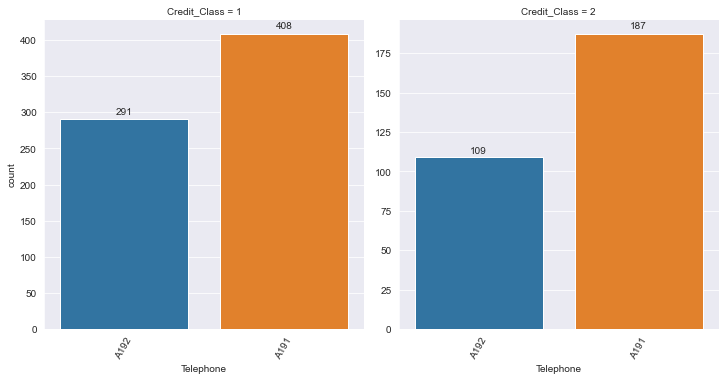

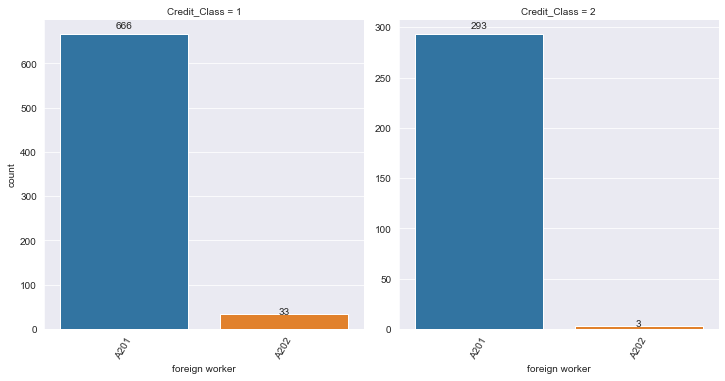

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


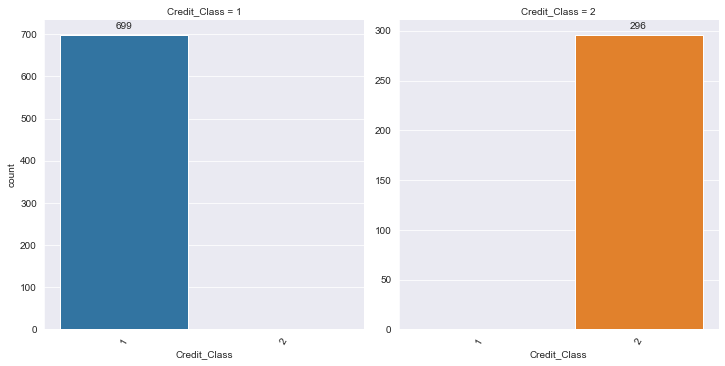

In [28]:
#Observando a relação de cada variavel categórica com a classe do cliente
for col in categorical_columns:
    if data[col].nunique() <= 10:
        g = sns.catplot(x = col, kind='count', col = 'Credit_Class', data=data, sharey=False)
        g.set_xticklabels(rotation=60)
        for i in range(data['Credit_Class'].nunique()):
            ax = g.facet_axis(0,i)
            for p in ax.patches:
                height = p.get_height()
                ax.text(x = p.get_x()+(p.get_width()/2),  y  = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')

A partir dos dados acima, podemos concluir que as variaveís:

- Status of existing account: Clientes com status A11, A12 possuem mais tendência a serem Classe 2 e com status A14 a serem Classe 1
- Credit History: Clientes com histórico A34 tem mais tendência a serem Classe 1
- Purpose: Cliente Classe 1 normalmente são A43 e A41, e cliente classe 2 A40.
- Savings account/bonds: Não existe muito diferença entre os tipos de cliente, mas Cliente Classe 1 apresenta um maior status A65
- Present employment since: Clientes Classe 2 apresentam mais tendência a A72 e Classe 1 a A75.
- Personal status and sex: Clientes 2 apresentam apresentam um ligeira tendência a A92.
- Other debtors/guarantors: Não Existe muita diferença entre os tipos de classe de cliente.
- Property: Cliente Classe 1 apresentam mais tendência a A121 e Cliente Classe 2 a A124.
- Other installment plans: Não existe muita difença entre os tipos de classe de cliente.
- Housing: Não existe muita difença entre os tipos de classe de cliente.
- Job: Não existe muita difença entre os tipos de classe de cliente.
- Telephone: Não existe muita difença entre os tipos de classe de cliente.
- Foreign worker: Não existe muita difença entre os tipos de classe de cliente.

### 5.2  Variáveis Númericas

Será explorado as variaveis númericas e suas relações com a classificação dos clientes

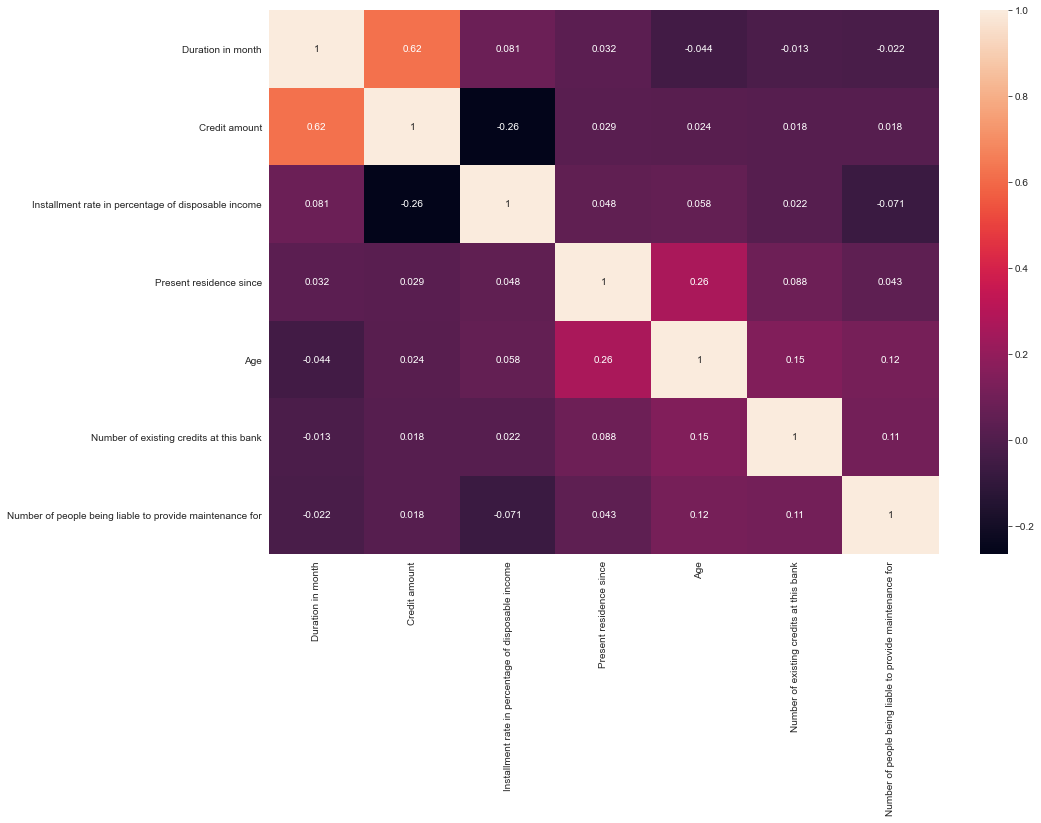

In [29]:
#Analisando a correlação entre as variaveis númericas
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

A partir do gráfico acima, podemos concluir que:

- O Credit Amount apresenta uma correlação mediana com a Duration in Mounts
- A Idade apresent uma correlação fraca com a variavel Present Residence since
- A Installment rate in percentage of disposaable income apresenta um correlação fraca negativa com a Credit Amount

Como que as correlações são baixas, não será necessário a eliminação de nenhuma variável

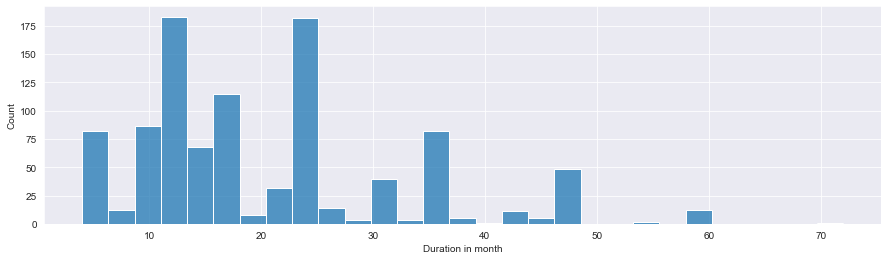

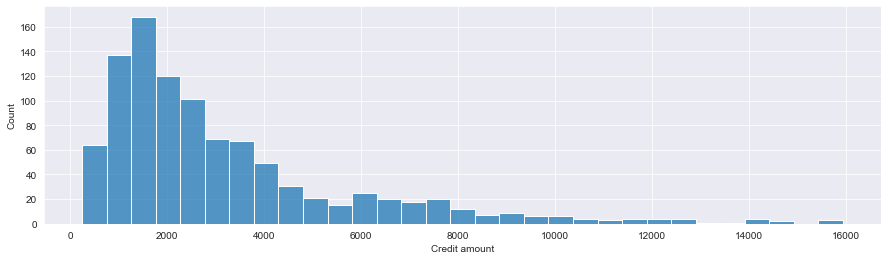

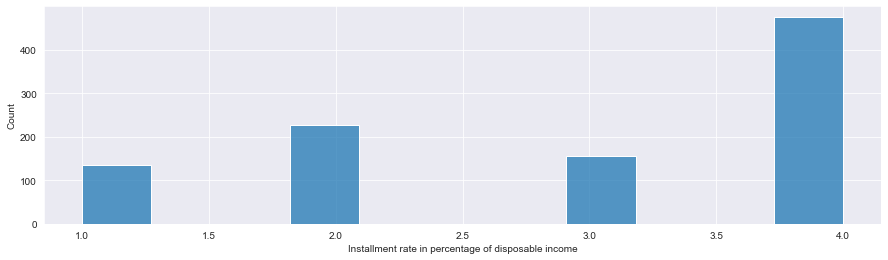

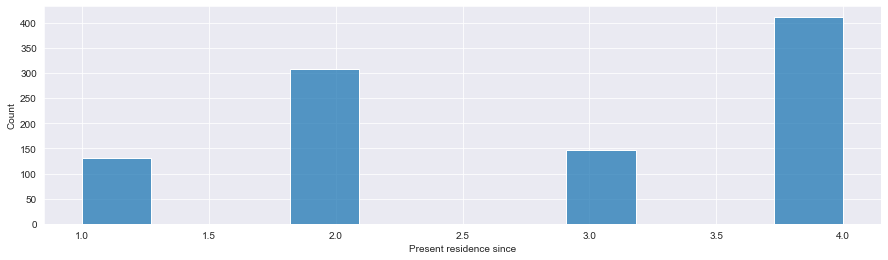

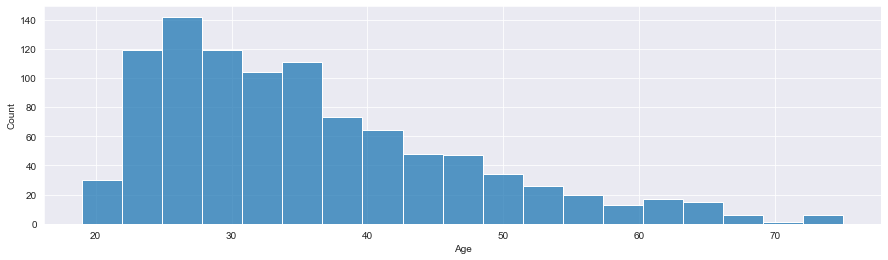

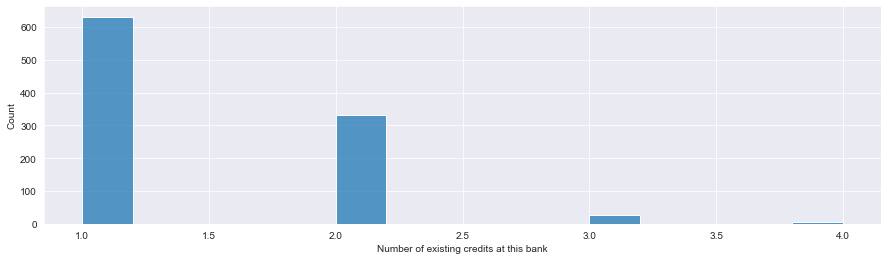

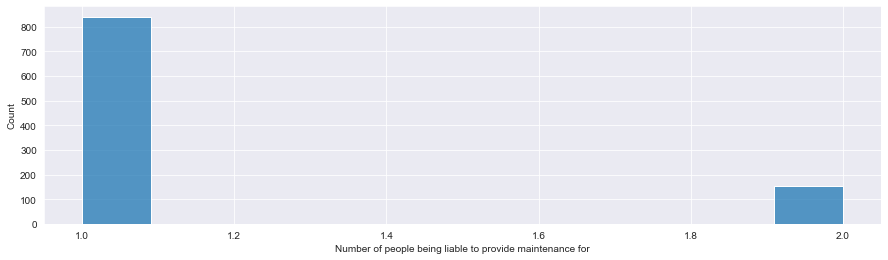

In [30]:
#Exibindo histogramas das varíaveis categóricas
for col in numerical_columns:
    plt.figure(figsize = (15,4))
    sns.histplot(data[col])
    plt.show()

In [31]:
data[data['Credit_Class'] == '1'].describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,19.183119,2967.042918,2.921316,2.842632,36.214592,1.424893,1.155937
std,11.069238,2353.217534,1.128348,1.109150,11.386402,0.584919,0.363055
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1375.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2241.000000,3.000000,3.000000,34.000000,1.000000,1.000000
75%,24.000000,3627.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,15653.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [32]:
data[data['Credit_Class'] == '2'].describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,24.668919,3800.560811,3.111486,2.847973,33.881757,1.361486,1.152027
std,13.144510,3337.746505,1.085062,1.098780,11.187593,0.559421,0.359655
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1344.750000,2.000000,2.000000,25.000000,1.000000,1.000000
50%,24.000000,2529.000000,4.000000,3.000000,31.000000,1.000000,1.000000
75%,36.000000,4950.500000,4.000000,4.000000,40.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,74.000000,4.000000,2.000000


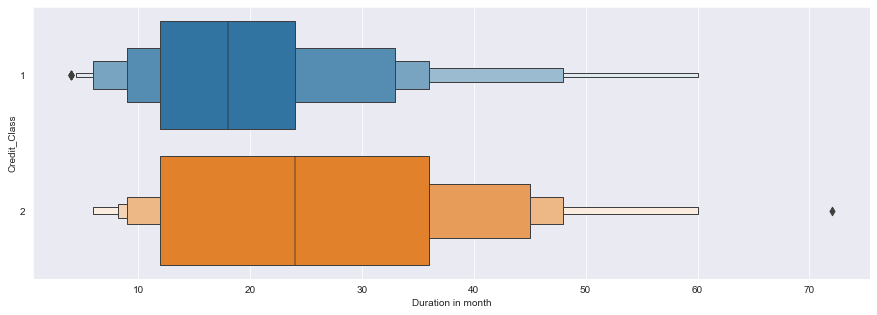

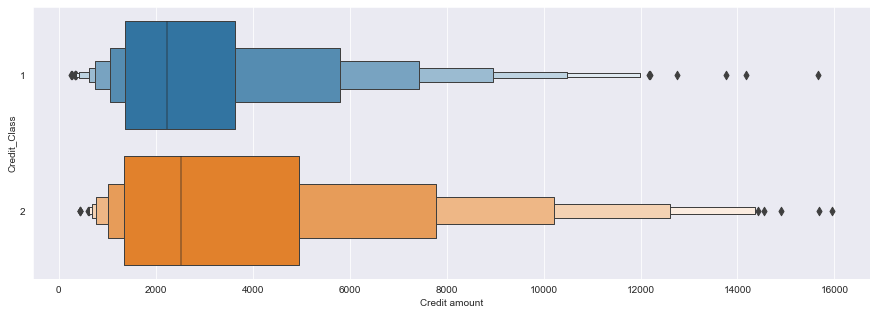

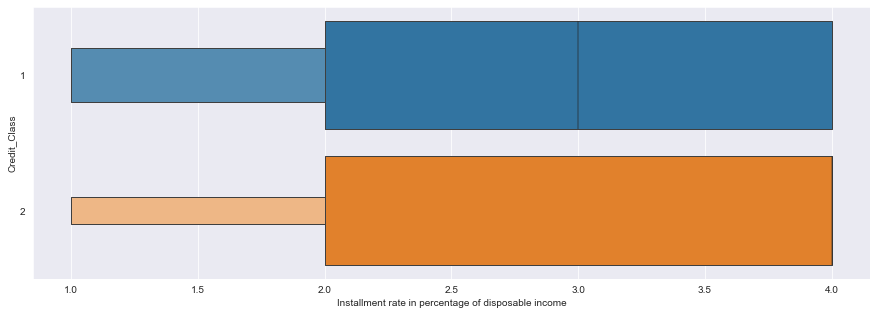

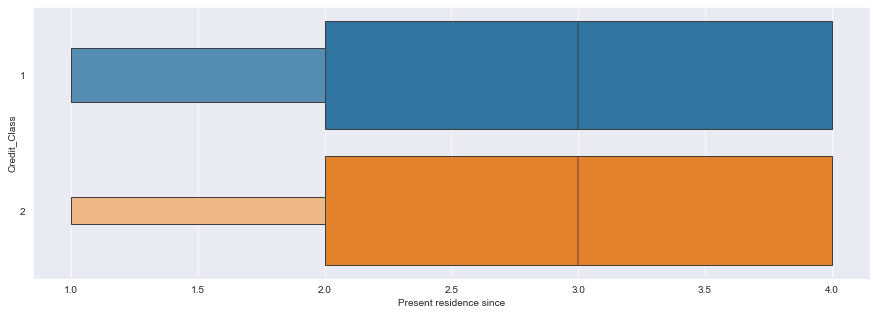

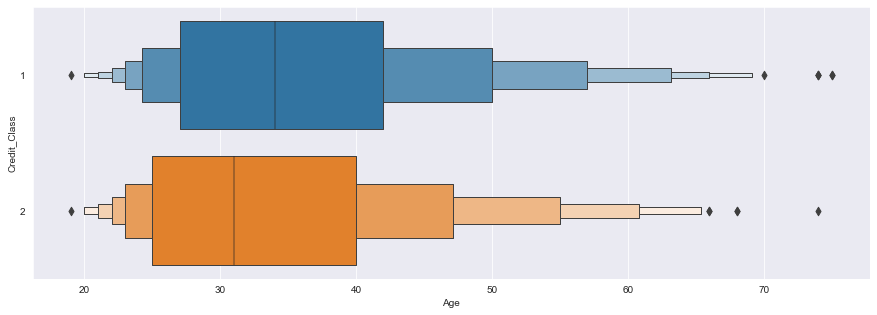

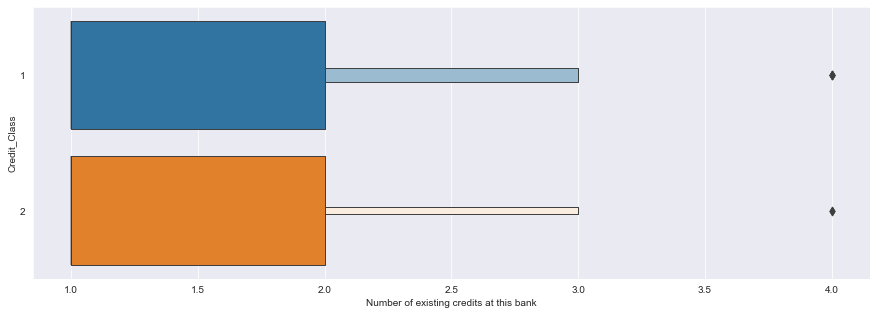

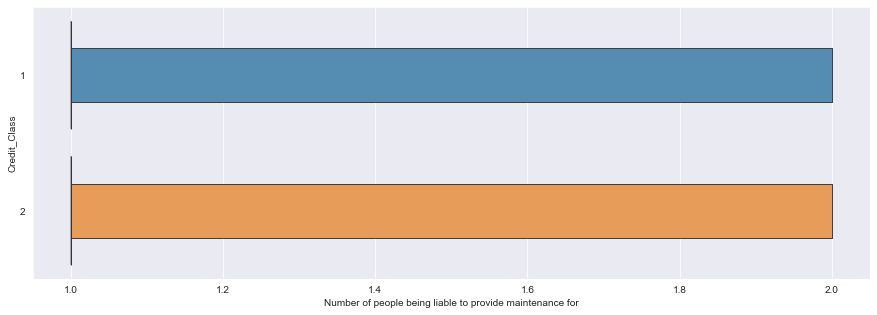

In [33]:
for col in numerical_columns:
    plt.figure(figsize=(15,5))
    sns.boxenplot(x = data[col], y = data['Credit_Class'])
    plt.show()

A partir dos gráficos mostrado acima e tabela de estatística descritiva, podemos concluir que as variáveis:

- Duration in month: Clientes Classe 1 tem uma média de 19.2 e Clientes Classe 2 a média é aproximadamente 24.67.
- Credit amount: Clientes Classe 1 uma média próxima de 2967.04 e Classe 2 em torno de 3800.56
- Installment rate in percentage of disposable income: Não diferença significativa entre as classes de cliente
- Present residence since: Não diferença significativa entre as classes de cliente
- Age: Clientes Classe 1 possue uma idade média de 33.88 e Classe 2 aproximadamente 36.21
- Number of existing credits at this bank: Não diferença significativa entre as classes de cliente.
- Number of people being liable to provide maintence for: Não diferença significativa entre as classes de cliente

## 6. Feature Engineering

Nesta etapa será realizado o tratamento das variáveis categoricas. Esta etapa é essêncial devido os algoritmos de Machine Learning não reconhecerem o a informação qualitativa presente nestas variáveis. Portanto é necessário realizar a transformação delas em informações númericas

Será utilizado dois métodos diferentes para o tratamento destas variáveis. O método com melhor performance nos algoritmos de machine learning será escolhido para realizar os futuras previsões.

### 6.1 One Hot Enconding

Neste primeiro método será utilizado o One Hot Enconding, onde as variaveis categóricas são transformação em diversas colunas que atendem o sistema binário.

In [34]:
#Obtendo o novo dataset com as novas colunas
data_dummies = pd.get_dummies(data, columns = categorical_columns[:-1], drop_first=True )

In [35]:
data_dummies

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Credit_Class,Status of existing account_A12,Status of existing account_A13,...,Property_A124,Other installment plans_A142,Other installment plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,foreign worker_A202
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,2,0,0,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,1,0,0,...,0,0,1,1,0,0,0,1,1,0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,2,0,0,...,1,0,1,0,1,0,1,0,1,0


In [36]:
#Convertando os dados para formato inteiro
data['Credit_Class'] = data['Credit_Class'].astype('int64')

In [37]:
#Separando as variáveis em colunas X e Y
x = data_dummies.drop('Credit_Class', axis = 1)
y = data_dummies['Credit_Class']

In [38]:
#Iniciando o modelo de RandomForest para a análise de performance
model = RandomForestClassifier()

In [39]:
#Analisando a performance pelo método da validação cruzada
ohe_score = cross_val_score(model,x,y,cv = 10, scoring = 'roc_auc')

In [41]:
#Valor da métrica ROC AUC para o método
ohe_score.mean()

0.783435556031508

### 6.2 Target Encoding

Também conhecido Mean Encoding, neste método o encoding é feito por meio da análise da relação destas variaveis com a variavel alvo. Nele não há o acréscimo de colunas como no OHE.

In [40]:
#Redefinindo as variáveis x e y
x = data.drop('Credit_Class', axis = 1)
y = data['Credit_Class']

In [41]:
#Iniciando o encoder
cat_enc = TargetEncoder(cols = categorical_columns[:-1]).fit(x,y)

In [42]:
#Transformando as informações categoricas
x = cat_enc.transform(x)

In [43]:
x

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1.494505,6.0,1.167808,1.221429,1169.0,1.174863,1.250000,4.0,1.263736,1.298343,4.0,1.212766,67.0,1.274631,1.258110,2.0,1.295238,1.0,1.272500,1.305527
1,1.381132,48.0,1.318182,1.221429,5951.0,1.357262,1.300595,2.0,1.347403,1.298343,2.0,1.212766,22.0,1.274631,1.258110,1.0,1.295238,1.0,1.314286,1.305527
2,1.116751,12.0,1.167808,1.440000,2096.0,1.357262,1.224138,2.0,1.263736,1.298343,3.0,1.212766,49.0,1.274631,1.258110,1.0,1.280000,2.0,1.314286,1.305527
3,1.494505,42.0,1.318182,1.320442,7882.0,1.357262,1.224138,2.0,1.263736,1.192308,4.0,1.303030,45.0,1.274631,1.401869,1.0,1.295238,2.0,1.314286,1.305527
4,1.494505,24.0,1.318182,1.380342,4870.0,1.357262,1.300595,3.0,1.263736,1.298343,4.0,1.431373,53.0,1.274631,1.401869,2.0,1.295238,2.0,1.314286,1.305527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.116751,12.0,1.318182,1.320442,1736.0,1.357262,1.224138,3.0,1.347403,1.298343,4.0,1.212766,31.0,1.274631,1.258110,1.0,1.280000,1.0,1.314286,1.305527
996,1.494505,30.0,1.318182,1.165049,3857.0,1.357262,1.300595,4.0,1.408163,1.298343,4.0,1.303030,40.0,1.274631,1.258110,1.0,1.328671,1.0,1.272500,1.305527
997,1.116751,12.0,1.318182,1.221429,804.0,1.357262,1.250000,4.0,1.263736,1.298343,4.0,1.303951,38.0,1.274631,1.258110,1.0,1.295238,1.0,1.314286,1.305527
998,1.494505,45.0,1.318182,1.221429,1845.0,1.357262,1.300595,4.0,1.263736,1.298343,4.0,1.431373,23.0,1.274631,1.401869,1.0,1.295238,1.0,1.272500,1.305527


In [47]:
#Definindo o modelo para análise de performance
model = RandomForestClassifier()

In [48]:
#Analisando a performance pelo método da validação cruzada
te_score= cross_val_score(model,x,y,cv = 10, scoring = 'roc_auc')

In [49]:
#Valor da métrica ROC AUC para o método
te_score.mean()

0.8001395016777325

O método de One Hot Encoding teve a métrica ROC AUC = 0.783

O método Target Encoding teve a métrica ROC AUC = 0.80

Pelos resultados obtidos, é possível concluir que o método mais eficaz para a transformação dos dados categóricos é o Target Encoding devido seu maior desempenho na métrica escolhida.

## 7. Presets

Nesta etapa será configura alguns parametros e funções para auxiliar a utilização e análise dos modelos de Machine Learning por meio da sua performance

In [53]:
#Conferindo a variavel x
x

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1.494505,6.0,1.167808,1.221429,1169.0,1.174863,1.250000,4.0,1.263736,1.298343,4.0,1.212766,67.0,1.274631,1.258110,2.0,1.295238,1.0,1.272500,1.305527
1,1.381132,48.0,1.318182,1.221429,5951.0,1.357262,1.300595,2.0,1.347403,1.298343,2.0,1.212766,22.0,1.274631,1.258110,1.0,1.295238,1.0,1.314286,1.305527
2,1.116751,12.0,1.167808,1.440000,2096.0,1.357262,1.224138,2.0,1.263736,1.298343,3.0,1.212766,49.0,1.274631,1.258110,1.0,1.280000,2.0,1.314286,1.305527
3,1.494505,42.0,1.318182,1.320442,7882.0,1.357262,1.224138,2.0,1.263736,1.192308,4.0,1.303030,45.0,1.274631,1.401869,1.0,1.295238,2.0,1.314286,1.305527
4,1.494505,24.0,1.318182,1.380342,4870.0,1.357262,1.300595,3.0,1.263736,1.298343,4.0,1.431373,53.0,1.274631,1.401869,2.0,1.295238,2.0,1.314286,1.305527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.116751,12.0,1.318182,1.320442,1736.0,1.357262,1.224138,3.0,1.347403,1.298343,4.0,1.212766,31.0,1.274631,1.258110,1.0,1.280000,1.0,1.314286,1.305527
996,1.494505,30.0,1.318182,1.165049,3857.0,1.357262,1.300595,4.0,1.408163,1.298343,4.0,1.303030,40.0,1.274631,1.258110,1.0,1.328671,1.0,1.272500,1.305527
997,1.116751,12.0,1.318182,1.221429,804.0,1.357262,1.250000,4.0,1.263736,1.298343,4.0,1.303951,38.0,1.274631,1.258110,1.0,1.295238,1.0,1.314286,1.305527
998,1.494505,45.0,1.318182,1.221429,1845.0,1.357262,1.300595,4.0,1.263736,1.298343,4.0,1.431373,23.0,1.274631,1.401869,1.0,1.295238,1.0,1.272500,1.305527


In [54]:
#Conferindo a variavel y
y

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: Credit_Class, Length: 995, dtype: int64

In [56]:
#Definindo a função para avaliar a performance dos modelos
models_results = []

def classify(model,x,y,name):
    k = KFold(n_splits= 10, random_state=42, shuffle = True)
    cross_val = np.mean(cross_val_score(model,x, y, cv = k, scoring= 'roc_auc'))
    models_results.append([name, cross_val])


A métrica escolhida para avaliar a performance dos modelos de Machine Learning foi a ROC AUC devido a existência do desbalaceamento de classes na variavel alvo, sendo assim não é possível usar a métrica acurácia.

## 8. Machine Learning

Nesta seção será definido os algoritmos de Machine Learning e será testado a performances deles na previsão da classificação do cliente. A partir da métrica definido na acima, o modelo com melhor performance será escolhido.

In [57]:
#Test dos modelos dee ML

model = LogisticRegression()
classify(model,x,y,'Logistic Regression')

model = DecisionTreeClassifier()
classify(model,x,y,"Decision Tree")

model = RandomForestClassifier()
classify(model,x,y,"Random Forest")

model = GradientBoostingClassifier()
classify(model,x,y,'Gradient Boost')

model = AdaBoostClassifier()
classify(model,x,y,'Ada Boost')

model = XGBClassifier()
classify(model,x,y,'XGBoost')

model = SVC()
classify(model,x,y,'SVM')

model = KNeighborsClassifier()
classify(model,x,y,'KNN')

model = GaussianNB()
classify(model,x,y,'Naive Bayes')


[19:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [58]:
#Getting the results of the models tested
models_results = pd.DataFrame(models_results)
models_results.columns = ['Models','ROC AUC']

In [59]:
models_results.sort_values(by='ROC AUC', ascending = False)

,Models,ROC AUC
2,Random Forest,0.792610
3,Gradient Boost,0.790812
8,Naive Bayes,0.780033
5,XGBoost,0.769025
4,Ada Boost,0.759764
0,Logistic Regression,0.661542
1,Decision Tree,0.628506
7,KNN,0.535952
6,SVM,0.523649


Pelo resultado mostrado acima, podemos concluir que o modelo que possui a melhor performance para a previsão do problema deste projeto com a Random Forest com métrica ROC AUC no valor de 0.793.

### 8.1 Tunning

Para melhorar a performance do algoritmo de Grandient Boosting, será feito um estudo de quais parametros fornecem a melhor performance na classificação do cliente. Para isso será utilizada a função GridSearch que esta contido dentro da biblioteca do ScikitLearn.

In [60]:
#Definindo o modelo com maior métrica
model = RandomForestClassifier()

In [63]:
n_estimators = [100, 300, 500, 750]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

k = KFold(n_splits= 10, random_state=42, shuffle = True)
gridF = GridSearchCV(model, hyperF, cv = k, scoring = 'roc_auc')

In [64]:
bestF = gridF.fit(x, y)

In [65]:
#Melhores parametros
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [73]:
#Melhor Score
bestF.best_score_

0.8024648152872558

In [75]:
#Biblioteca para salvar o modelo tunnado
import pickle

In [77]:
#Salvando o modelo
pickle.dump(bestF, open('model_tunned.pkl', 'wb'))

### 8.2 Previsão de novos valores

Abaixo será mostrado o modelo realizando a classificação de um novo cliente dado a lista de variaveis.

In [94]:
dados_teste = pd.DataFrame([[
    'A12',
    15,
    'A34',
    'A41',
    3000,
    'A62',
    'A73',
    0.2,
    'A93',
    'A103',
    1,
    'A121',
    25,
    'A143',
    'A151',
    2,
    'A173',
    2,
    'A192',
    'A202'
]], columns = x.columns )

In [95]:
dados_teste

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,A12,15,A34,A41,3000,A62,A73,0.2,A93,A103,1,A121,25,A143,A151,2,A173,2,A192,A202


In [96]:
dados_teste = cat_enc.transform(dados_teste)

In [97]:
dados_teste

,Status of existing account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1.381132,15,1.167808,1.165049,3000,1.323529,1.300595,0.2,1.263736,1.192308,1,1.212766,25,1.274631,1.391061,2,1.295238,2,1.2725,1.083333


In [98]:
bestF.predict(dados_teste)

array([1], dtype=int64)

Portanto de acordo com os dados fornecidos, a previsão do cliente é classe 1

### 8.3 Feature Importance

Nesta seção será avaliado quais variaveis possuem o maior impacto na classificação do cliente

In [44]:
model = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, min_samples_split= 2, n_estimators= 500)

In [45]:
model.fit(x,y)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=500)

In [46]:
importance = pd.DataFrame({'Variaveis': x.columns, 'Importancia': model.feature_importances_})

In [49]:
#10 Variaveis mais importantes
importance.sort_values('Importancia', ascending = False).head(10)

,Variaveis,Importancia
0,Status of existing account,0.136801
4,Credit amount,0.129888
1,Duration in month,0.103174
12,Age,0.100909
3,Purpose,0.069338
2,Credit History,0.056792
5,Savings account/bonds,0.050641
6,Present employment since,0.049262
11,Property,0.045065
7,Installment rate in percentage of disposable i...,0.041286


## 9 Conclusões

A partir dos passos mostrados no decorrer deste projeto, foi possível entender a relação das variaveis presentes nos dados com a classificação de um cliente. Portanto foi possível levantar o perfil do cliente que esta presente em cada categoria.

Assim, podemos levantar que um cliente classe 1 (Bom) apresenta as seguintes características mais relevantes:
- Não tem conta corrente
- Conta crítica
- Proposito em carro novo e radio/televisão
- Empregado a mais de 7 anos
- Possui propriedade
- Duração em mes na média de 19.2
- Quantidade de crédito em torno de 2967.04

E um cliente classe 2 (Ruim) as seguintes:
- Conta corrente entre 0<= X <= 200 DM.
- Proposito em mobilia e equipamentos.
- Empregado a menos de 1 ano.
- Não possui propriedade.
- Duração em mes na média de 24.67.
- Quantidade de crédito em torno de 3800

E para atingir o objetivo principal deste projeto, foi feito um modelo preditivo a partir de algortimos de Machine Learning para realizar a classificação do cliente em bom ou ruim em poucos segundos, auxiliando assim na tarefa de aprovação ou recusa deste cliente. Portanto com o desenvolvimento deste projeto, a chance de realizar bons négocios com clientes foi aprimorada, tornando-se rápido e confiável a tomada de ação.

Sugestão para melhorar o resultado:
- Para melhorar a performance do modelo preditivo na classificação do cliente, um dos fatores mais determinante é a quantidade de dados. Quanto mais dados utilizados para treino e validação do modelo, melhor será o resultado. Portanto aumentar o número de dados irá auxiliar em predições mais precisas. 

## 10. Deploy

Para que o modelo preditivo seja utilizado por demais pessoas, o deploy é extremamente necessário. A partir desta técnica, o usuário pode inserir os dados para realizar a classificação dos clientes a partir de uma interface mais amigável.

O deploy deste projeto será realizado a partir do Heroku, uma nuvem gratuita onde estará hospedado o modelo, e também com o auxilio da biblioteca Streamlit para criar interface onde o usuário consegue inserir os dados de forma simples e fácil.

Para acessar o deploy deste modelo, acesse o link: https://libercapital-app.herokuapp.com/

OBS: Por se tratar de uma nuvem gratuita, pode acontecer alguns problemas de lentidão para acessar o site.